In [3]:
import os
print(os.getcwd())




C:\Users\sai seggoju\retail-sales-analytics


In [4]:
import os
os.makedirs("data", exist_ok=True)


In [5]:
import pandas as pd

df = pd.read_csv("data/retail_sales.csv")  # now it will work
print("✅ Dataset loaded!")
df.head()

✅ Dataset loaded!


,OrderID,Date,Product,Category,Quantity,UnitPrice,TotalSales
0,1,2024-01-10,Shirt,Clothing,2,20,40
1,2,2024-01-15,Shoes,Footwear,1,50,50
2,3,2024-02-05,Hat,Accessories,3,10,30
3,4,2024-02-15,Shirt,Clothing,1,20,20
4,5,2024-03-01,Shoes,Footwear,2,50,100


In [6]:
# Check dataset info
print(df.info())

# Summary statistics
print(df.describe())

# Check missing values
print("Missing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OrderID      6 non-null      int64 
 1   Date         6 non-null      object
 2   Product      6 non-null      object
 3   Category     6 non-null      object
 4   Quantity     6 non-null      int64 
 5   UnitPrice    6 non-null      int64 
 6   TotalSales   6 non-null      int64 
dtypes: int64(4), object(3)
memory usage: 468.0+ bytes
None
        OrderID  Quantity   UnitPrice  TotalSales 
count  6.000000  6.000000    6.000000     6.000000
mean   3.500000  1.666667   41.666667    56.666667
std    1.870829  0.816497   33.115958    35.023801
min    1.000000  1.000000   10.000000    20.000000
25%    2.250000  1.000000   20.000000    32.500000
50%    3.500000  1.500000   35.000000    45.000000
75%    4.750000  2.000000   50.000000    87.500000
max    6.000000  3.000000  100.000000   100.000000
Missing valu

C:\Users\sai seggoju\AppData\Local\Temp\ipykernel_37048\1818987507.py:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sai seggoju\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


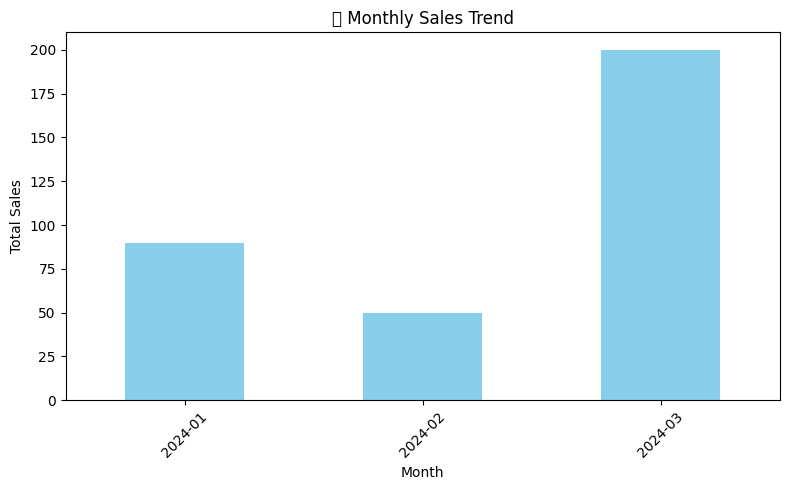

In [10]:
# Make sure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# If TotalSales column does not exist, create it
if 'TotalSales' not in df.columns:
    df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Group sales by month
monthly_sales = df.groupby(df['Date'].dt.to_period("M"))['TotalSales'].sum()

# Convert PeriodIndex to string for plotting
monthly_sales.index = monthly_sales.index.astype(str)

# Plot
plt.figure(figsize=(8,5))
monthly_sales.plot(kind='bar', color="skyblue")
plt.title("📈 Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






In [11]:
# Save chart to file
plt.savefig("reports/figures/monthly_sales_trend.png")
plt.show()


<Figure size 640x480 with 0 Axes>

C:\Users\sai seggoju\AppData\Local\Temp\ipykernel_37048\2237228804.py:5: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.savefig("reports/figures/top_products.png")
C:\Users\sai seggoju\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


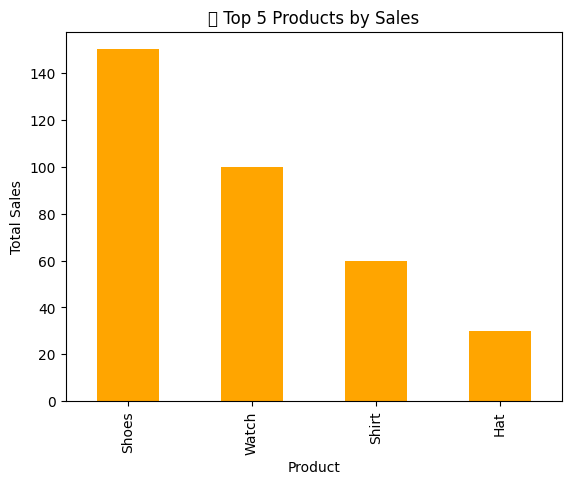

In [12]:
top_products = df.groupby("Product")["TotalSales"].sum().sort_values(ascending=False).head(5)
top_products.plot(kind="bar", color="orange")
plt.title("🏆 Top 5 Products by Sales")
plt.ylabel("Total Sales")
plt.savefig("reports/figures/top_products.png")
plt.show()
